In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import os
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("C:/Users/User/Desktop/KAGGLE DATA/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print(data.shape[0])
print(data.columns.tolist())
print(data.dtypes)

150
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [7]:
data["Species"] = data.Species.str.replace("Iris-", "")

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [8]:
data.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [11]:
stats_df= data.describe()
stats_df.loc["range"] = stats_df.loc["max"] - stats_df.loc["min"]

out_fields = ["mean","25%","50%","75%","range"]
stats_df = stats_df.loc[out_fields]
stats_df.rename({"50%":"median"},inplace=True)
stats_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
mean,75.50,5.843333,3.054,3.758667,1.198667
25%,38.25,5.100000,2.800,1.600000,0.300000
median,75.50,5.800000,3.000,4.350000,1.300000
75%,112.75,6.400000,3.300,5.100000,1.800000
range,149.00,3.600000,2.400,5.900000,2.400000


In [13]:
data.groupby("Species").mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
setosa,25.5,5.006,3.418,1.464,0.244
versicolor,75.5,5.936,2.770,4.260,1.326
virginica,125.5,6.588,2.974,5.552,2.026


In [14]:
data.groupby("Species").median()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
setosa,25.5,5.0,3.4,1.50,0.2
versicolor,75.5,5.9,2.8,4.35,1.3
virginica,125.5,6.5,3.0,5.55,2.0


In [15]:
data.groupby("Species").agg(["mean","median"])
data.groupby("Species").agg([np.mean,np.median])

Id        SepalLengthCm        SepalWidthCm         \
             mean median          mean median         mean median   
Species                                                             
setosa       25.5   25.5         5.006    5.0        3.418    3.4   
versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
virginica   125.5  125.5         6.588    6.5        2.974    3.0   

           PetalLengthCm        PetalWidthCm         
                    mean median         mean median  
Species                                              
setosa             1.464   1.50        0.244    0.2  
versicolor         4.260   4.35        1.326    1.3  
virginica          5.552   5.55        2.026    2.0

In [18]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'Species'}
agg_dict['PetalLengthCm'] = 'max'
pprint(agg_dict)
data.groupby('Species').agg(agg_dict)
### END SOLUTION

{'Id': ['mean', 'median'],
 'PetalLengthCm': 'max',
 'PetalWidthCm': ['mean', 'median'],
 'SepalLengthCm': ['mean', 'median'],
 'SepalWidthCm': ['mean', 'median']}


Id        SepalLengthCm        SepalWidthCm         \
             mean median          mean median         mean median   
Species                                                             
setosa       25.5   25.5         5.006    5.0        3.418    3.4   
versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
virginica   125.5  125.5         6.588    6.5        2.974    3.0   

           PetalLengthCm PetalWidthCm         
                     max         mean median  
Species                                       
setosa               1.9        0.244    0.2  
versicolor           5.1        1.326    1.3  
virginica            6.9        2.026    2.0

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline

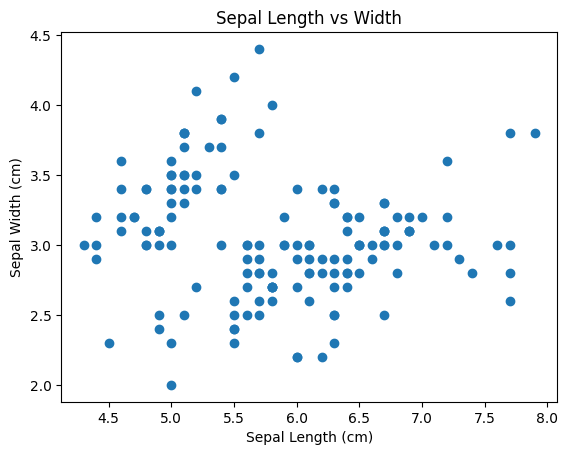

In [21]:
ax = plt.axes()

ax.scatter(data.SepalLengthCm,data.SepalWidthCm)

ax.set(xlabel="Sepal Length (cm)",
       ylabel="Sepal Width (cm)",
       title="Sepal Length vs Width");

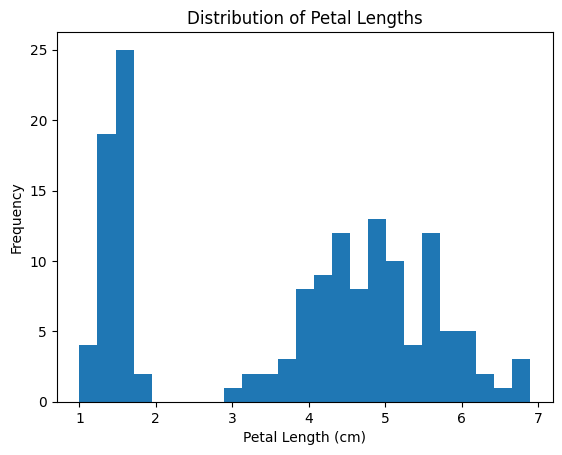

In [22]:
ax = plt.axes()

ax.hist(data.PetalLengthCm, bins=25);

ax.set(xlabel="Petal Length (cm)",
       ylabel="Frequency",
       title="Distribution of Petal Lengths");

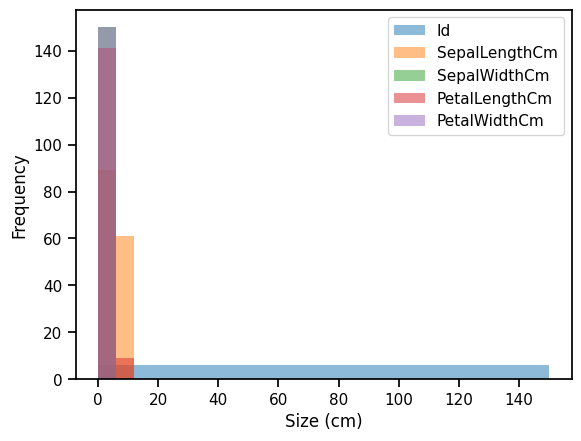

In [23]:
import seaborn as sns
sns.set_context("notebook")

ax = data.plot.hist(bins=25,alpha=0.5)
ax.set_xlabel("Size (cm)");

AttributeError: 'AxesSubplot' object has no attribute 'is_last_row'

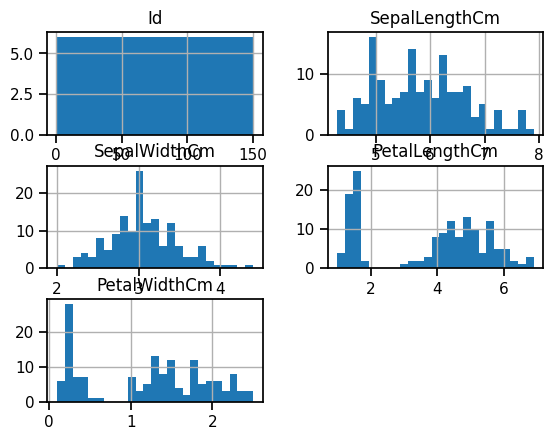

In [24]:
axList = data.hist(bins=25)

for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel("Size (cm)")
    
    if ax.is_first_col():
        ax.set_ylabel("Frequency")    

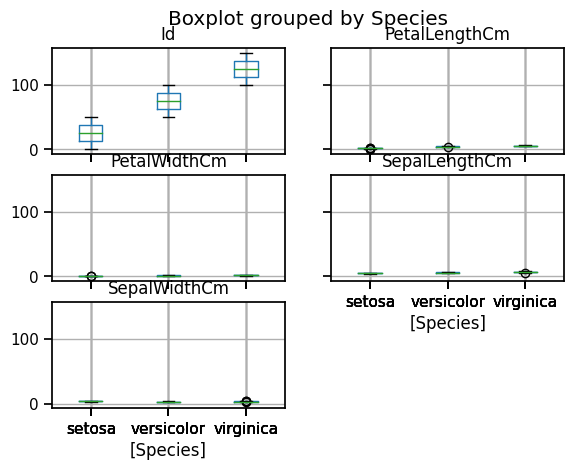

In [25]:
data.boxplot(by="Species");

In [26]:
plot_data = (data
             .set_index("Species")
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:"size","level_1":"measurement"}))
plot_data.head()

,Species,measurement,size
0,setosa,Id,1.0
1,setosa,SepalLengthCm,5.1
2,setosa,SepalWidthCm,3.5
3,setosa,PetalLengthCm,1.4
4,setosa,PetalWidthCm,0.2


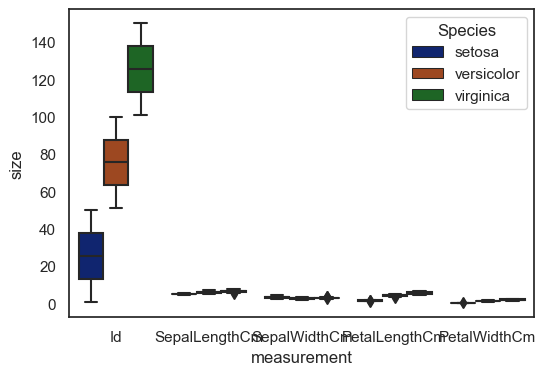

In [27]:
sns.set_style("white")
sns.set_context("notebook")
sns.set_palette("dark")

f = plt.figure(figsize=(6,4))
sns.boxplot(x="measurement",y="size",
            hue="Species",data=plot_data);


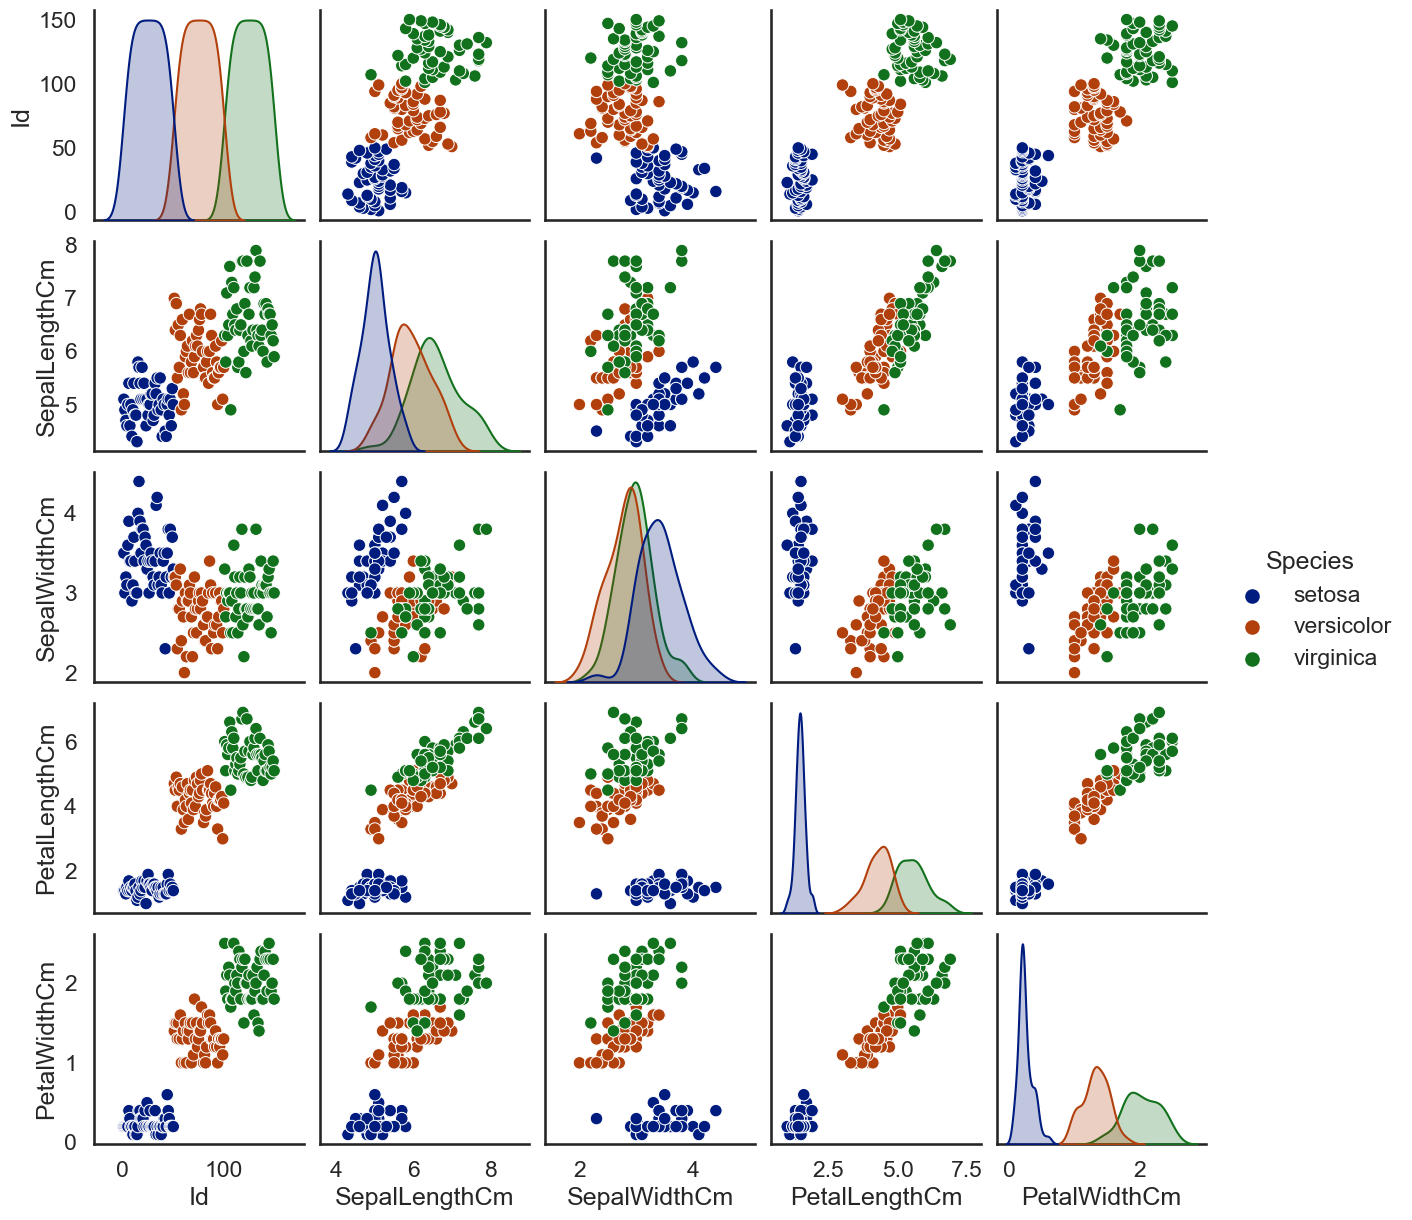

In [28]:
sns.set_context("talk")
sns.pairplot(data, hue="Species");